In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy.stats as stats

In [2]:
folder = r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\Nakuru_res0.002dg_complete_chirps"
Q_calibrated_path = os.path.join(folder, "output_fx0.4_ts_x8_kh_x0.05_kvx3_L5_2007_2021.csv")
Q_calibrated = pd.read_csv(Q_calibrated_path, sep=",", header=0, index_col=0, parse_dates=True)
#display(Q_calibrated)
gauges = ['Q_1']

Q_obs_path = os.path.join(folder, "Q_obs_2007_2021.csv")
Q_obs = pd.read_csv(Q_obs_path, sep=",",index_col=0, parse_dates=True)
#display(Q_obs)

gauges_obs = ['Discharge (m3/s) 2FC19']


In [3]:
return_periods = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, 
                21,22,23,24,25,26,27,28,29,30,
                31,32,33,34,35,36,37,38,39,40,
                41,42,43,44,45,46,47,48,49, 50,
                51,52,53,54,55,56,57,58,59,60,61,
                62,63,64,65,66,67,68,69,70,
                71,72,73,74,75,76,77,78,79,80,
                81,82,83,84,85,86,87,88,89,90,
                91,92,93,94,95,96,97,98,99,100]
return_periods = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, 
                21,22,23,24,25,26,27,28,29,30,
                31,32,33,34,35,36,37,38,39,40,
                41,42,43,44,45,46,47,48,49, 50]
return_periods = [t for t in return_periods if t <= 50]  # Limit to 50 years
probabilities = [1 - 1/t for t in return_periods]

In [4]:
# For calibrated data
# Create a DataFrame to store results

results = []

for gauge in gauges:
    # Filter vanaf 1 januari 2007
    Q_series = Q_calibrated[gauge]['2007-01-01':]
    # Get annual maxima
    annual_maxima = Q_series.resample('YE').max().dropna()
    # Fit Gumbel distribution
    params = stats.gumbel_r.fit(annual_maxima)
    # Calculate quantiles for each return period
    discharge_return_levels = stats.gumbel_r.ppf(probabilities, *params)
    # Store results
    for T, Q in zip(return_periods, discharge_return_levels):
        results.append({'Gauge': gauge, 'ReturnPeriod': T, 'Discharge_m3s': Q})

# Convert to DataFrame for easy viewing
df_return_periods = pd.DataFrame(results)

#display(df_return_periods)


In [5]:
# Now for the observed data
# Assume Q_obs is your DataFrame with datetime index and gauge columns

results_obs = []

for gauge in gauges_obs:
    # Filter vanaf 1 januari 2007
    Q_series_obs = Q_obs[gauge]['2007-01-01':]
    # Get annual maxima
    annual_maxima_obs = Q_series_obs.resample('YE').max().dropna()
    # Fit Gumbel distribution
    params_obs = stats.gumbel_r.fit(annual_maxima_obs)
    # Calculate quantiles for each return period
    discharge_return_levels_obs = stats.gumbel_r.ppf(probabilities, *params_obs)
    # Store results
    for T, Q in zip(return_periods, discharge_return_levels_obs):
        results_obs.append({'Gauge': gauge, 'ReturnPeriod': T, 'Discharge_m3s': Q})

# Convert to DataFrame for easy viewing
df_return_periods_obs = pd.DataFrame(results_obs)

display(df_return_periods_obs)

,Gauge,ReturnPeriod,Discharge_m3s
0,Discharge (m3/s) 2FC19,2,20.557737
1,Discharge (m3/s) 2FC19,3,30.701384
2,Discharge (m3/s) 2FC19,4,37.193432
3,Discharge (m3/s) 2FC19,5,41.999219
4,Discharge (m3/s) 2FC19,6,45.821352
5,Discharge (m3/s) 2FC19,7,48.996473
6,Discharge (m3/s) 2FC19,8,51.712896
7,Discharge (m3/s) 2FC19,9,54.086883
8,Discharge (m3/s) 2FC19,10,56.195346
9,Discharge (m3/s) 2FC19,11,58.091839


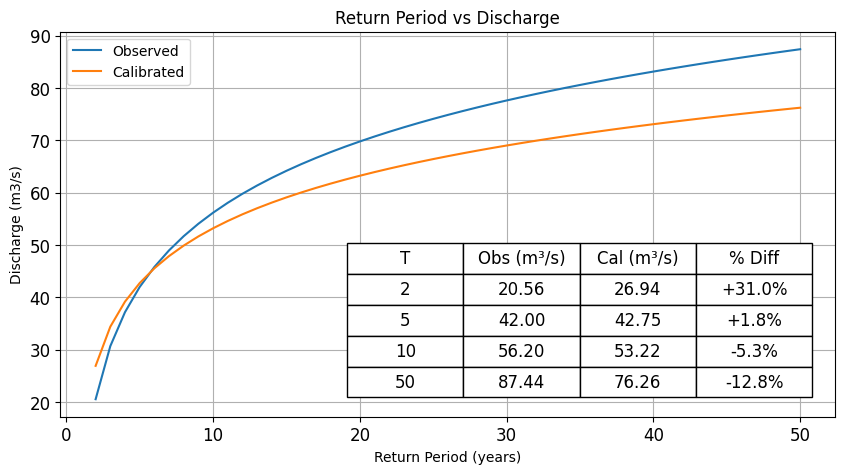

In [6]:
# Calculate percentage differences for T=5, 10, 50
summary = []
for T in [2, 5, 10, 50]:
    obs_val = df_return_periods_obs[df_return_periods_obs['ReturnPeriod'] == T]['Discharge_m3s'].values[0]
    cal_val = df_return_periods[df_return_periods['ReturnPeriod'] == T]['Discharge_m3s'].values[0]
    perc_diff = 100 * (cal_val - obs_val) / obs_val
    summary.append([T, obs_val, cal_val, perc_diff])

# Create table data
table_data = [
    [f"{row[0]}", f"{row[1]:.2f}", f"{row[2]:.2f}", f"{row[3]:+.1f}%"]
    for row in summary
]
col_labels = ["T", "Obs (m³/s)", "Cal (m³/s)", "% Diff"]

plt.figure(figsize=(10,5))
plt.plot(df_return_periods_obs['ReturnPeriod'], df_return_periods_obs['Discharge_m3s'], label='Observed')
plt.plot(df_return_periods['ReturnPeriod'], df_return_periods['Discharge_m3s'], label='Calibrated')
plt.xlabel('Return Period (years)')
plt.ylabel('Discharge (m3/s)')
plt.title('Return Period vs Discharge')
plt.legend()
plt.grid()

# # Add a white rectangle behind the table to hide the grid
from matplotlib.patches import Rectangle

ax = plt.gca()
# [x, y, width, height] in axes fraction coordinates (match bbox of the table)
rect = Rectangle((0.37, 0.05), 0.6, 0.4, transform=ax.transAxes,
                 color='white', zorder=2, linewidth=0)
ax.add_patch(rect)

# Place table inside the axes (bottom right)
the_table = plt.table(
    cellText=table_data,
    colLabels=col_labels,
    loc='lower right',
    cellLoc='center',
    bbox=[0.37, 0.05, 0.6, 0.4],
    zorder=3  # [left, bottom, width, height] in axes fraction
)

the_table.auto_set_font_size(False)
the_table.set_fontsize(12)  # Increase table font size

# Set background color for all cells (including header) to solid white (not transparent)
for key, cell in the_table.get_celld().items():
    cell.set_facecolor('white')  # Solid white background
    cell.set_edgecolor('black')
    cell.set_alpha(1.0)  # Not transparent

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("Return_Period_Analysis_Observed_vs_Modeled.png")
plt.show()

In [7]:
tahmo = pd.read_csv("TA00026.csv")
tahmo['timestamp'] = pd.to_datetime(tahmo['timestamp'], format='%Y-%m-%d')
tahmo.set_index('timestamp', inplace=True)

chirps = pd.read_csv("chirps_precip_TA00026.csv", index_col=0, parse_dates=True)

,precipitation (mm)
timestamp,
2015-08-28,0.81
2015-08-29,0.00
2015-08-30,0.11
2015-08-31,1.14
2015-09-01,1.95


,lon,lat,precipitation
time,,,
2015-08-28,36.175001,-0.275001,0.0
2015-08-29,36.175001,-0.275001,0.0
2015-08-30,36.175001,-0.275001,0.0
2015-08-31,36.175001,-0.275001,0.0
2015-09-01,36.175001,-0.275001,0.0


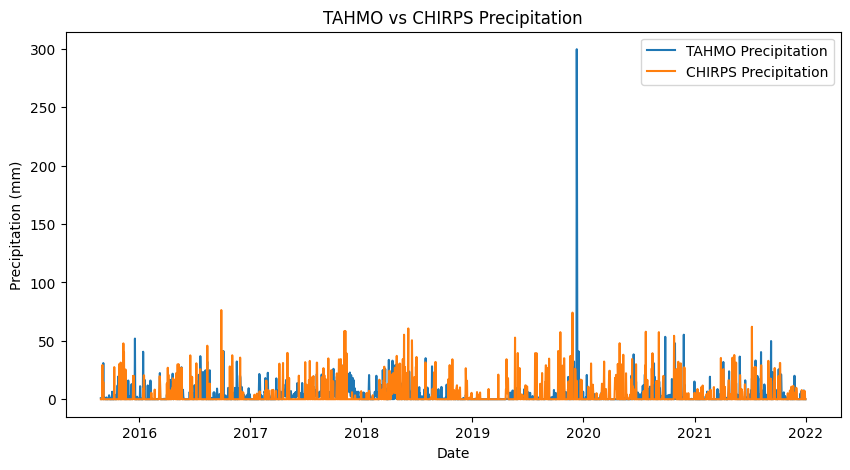

In [8]:
display(tahmo.head())
display(chirps.head())

plt.figure(figsize=(10, 5))
plt.plot(tahmo.index, tahmo['precipitation (mm)'], label='TAHMO Precipitation')
plt.plot(chirps.index, chirps['precipitation'], label='CHIRPS Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('TAHMO vs CHIRPS Precipitation')
plt.legend()


In [9]:

return_periods = [2,3,4,5,6,7,8,9,10]
return_periods = [t for t in return_periods if t <= 10]  # Limit to 50 years
probabilities = [1 - 1/t for t in return_periods]



In [10]:
# Now for the observed data
# Assume Q_obs is your DataFrame with datetime index and gauge columns

# # Remove the highest value from the TAHMO dataset
# max_idx = tahmo['precipitation (mm)'].idxmax()
# tahmo_clean = tahmo.drop(index=max_idx)

# # Remove the corresponding date from the CHIRPS dataset
# chirps_clean = chirps.drop(index=max_idx, errors='ignore')

# # Now use tahmo_clean and chirps_clean for further analysis
# display(tahmo_clean.head())
# display(chirps_clean.head())

results_tahmo = []

ann_max_tahmo = tahmo['precipitation (mm)'].resample('YE').max().dropna()
display(ann_max_tahmo)
params_tahmo = stats.gumbel_r.fit(ann_max_tahmo)
precipitation_return_levels_tahmo = stats.gumbel_r.ppf(probabilities, *params_tahmo)

for T, P in zip(return_periods, precipitation_return_levels_tahmo):
    results_tahmo.append({'Gauge': 'TA00026', 'ReturnPeriod': T, 'Precipitation_mm': P})

df_return_periods_tahmo = pd.DataFrame(results_tahmo)

display(df_return_periods_tahmo)

results_chirps = []

ann_max_chirps = chirps['precipitation'].resample('YE').max().dropna()
display(ann_max_chirps)
params_chirps = stats.gumbel_r.fit(ann_max_chirps)
precipitation_return_levels_chirps = stats.gumbel_r.ppf(probabilities, *params_chirps)

for T, P in zip(return_periods, precipitation_return_levels_chirps):
    results_chirps.append({'Gauge': 'TA00026', 'ReturnPeriod': T, 'Precipitation_mm': P})

df_return_periods_chirps = pd.DataFrame(results_chirps)

display(df_return_periods_chirps)

timestamp
2015-12-31     51.930
2016-12-31     41.270
2017-12-31     29.080
2018-12-31     35.137
2019-12-31    299.700
2020-12-31     55.235
2021-12-31     49.816
Freq: YE-DEC, Name: precipitation (mm), dtype: float64

,Gauge,ReturnPeriod,Precipitation_mm
0,TA00026,2,62.797958
1,TA00026,3,83.622953
2,TA00026,4,96.951185
3,TA00026,5,106.817505
4,TA00026,6,114.664378
5,TA00026,7,121.182928
6,TA00026,8,126.759768
7,TA00026,9,131.633585
8,TA00026,10,135.962276


time
2015-12-31    47.811520
2016-12-31    76.332330
2017-12-31    58.428170
2018-12-31    60.613945
2019-12-31    74.159950
2020-12-31    57.795506
2021-12-31    62.053288
Freq: YE-DEC, Name: precipitation, dtype: float64

,Gauge,ReturnPeriod,Precipitation_mm
0,TA00026,2,60.995035
1,TA00026,3,65.401901
2,TA00026,4,68.222346
3,TA00026,5,70.310200
4,TA00026,6,71.970711
5,TA00026,7,73.350129
6,TA00026,8,74.530268
7,TA00026,9,75.561638
8,TA00026,10,76.477651


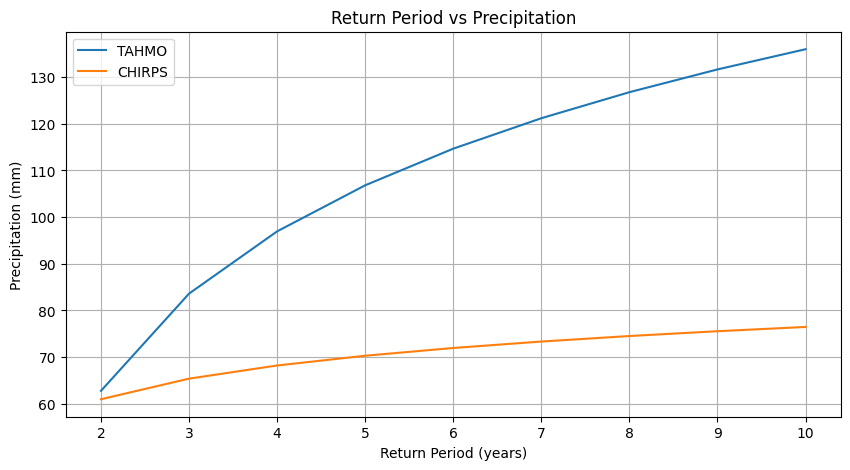

In [11]:
plt.figure(figsize=(10,5))
plt.plot(df_return_periods_tahmo['ReturnPeriod'], df_return_periods_tahmo['Precipitation_mm'], label='TAHMO')
plt.plot(df_return_periods_chirps['ReturnPeriod'], df_return_periods_chirps['Precipitation_mm'], label='CHIRPS')
plt.xlabel('Return Period (years)')
plt.ylabel('Precipitation (mm)')
plt.title('Return Period vs Precipitation')
plt.legend()
plt.grid()

In [16]:
import numpy as np
import scipy.stats as stats

# Prepare annual maxima
ann_max_tahmo = tahmo['precipitation (mm)'].resample('YE').max().dropna()

# Remove the highest value (robust fit)
ann_max_tahmo_robust = ann_max_tahmo.drop(ann_max_tahmo.idxmax())

# Fit Gumbel distribution
params_tahmo = stats.gumbel_r.fit(ann_max_tahmo_robust)
precipitation_return_levels_tahmo = stats.gumbel_r.ppf(probabilities, *params_tahmo)

# Continue as before...
results_tahmo = []
for T, P in zip(return_periods, precipitation_return_levels_tahmo):
    results_tahmo.append({'Gauge': 'TA00026', 'ReturnPeriod': T, 'Precipitation_mm': P})

df_return_periods_tahmo = pd.DataFrame(results_tahmo)
display(df_return_periods_tahmo)

results_chirps = []

ann_max_chirps = chirps['precipitation'].resample('YE').max().dropna()

# Remove the highest value (robust fit)
ann_max_chirps_robust = ann_max_chirps.drop(ann_max_chirps.idxmax())
#display(ann_max_chirps)
params_chirps = stats.gumbel_r.fit(ann_max_chirps_robust)
precipitation_return_levels_chirps = stats.gumbel_r.ppf(probabilities, *params_chirps)

for T, P in zip(return_periods, precipitation_return_levels_chirps):
    results_chirps.append({'Gauge': 'CHIRPS', 'ReturnPeriod': T, 'Precipitation_mm': P})

df_return_periods_chirps = pd.DataFrame(results_chirps)

display(df_return_periods_chirps)


,Gauge,ReturnPeriod,Precipitation_mm
0,TA00026,2,42.208952
1,TA00026,3,47.002861
2,TA00026,4,50.071017
3,TA00026,5,52.342242
4,TA00026,6,54.148590
5,TA00026,7,55.649159
6,TA00026,8,56.932946
7,TA00026,9,58.054897
8,TA00026,10,59.051361


,Gauge,ReturnPeriod,Precipitation_mm
0,CHIRPS,2,58.959609
1,CHIRPS,3,62.747361
2,CHIRPS,4,65.171564
3,CHIRPS,5,66.966098
4,CHIRPS,6,68.393326
5,CHIRPS,7,69.578951
6,CHIRPS,8,70.593294
7,CHIRPS,9,71.479767
8,CHIRPS,10,72.267091
